In [1]:
%%html
<style>
div.input {
    display:none;
}
</style>

In [2]:
import rdkit
from GUIMAIN import GUI_2

from ipywidgets import interact, Layout
import ipywidgets as widgets
from IPython.display import display, clear_output, Javascript

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

style = {'description_width': 'initial','font_weight':'bold'}
count =0
BB_list=[]
smiles=[]

In [3]:
import pybel
style = {'description_width': 'initial','font_weight':'bold'}
space_box = widgets.Box(layout=widgets.Layout(height ='55px', width='90%')) 
display(widgets.HTML(value="<font color=crimson><font size=5><b><u>SECTION 1: BUILDING BLOCKS</font>"))
second=widgets.Button(description='Proceed to the next section',layout= Layout(width= 'auto',border='solid 1px black'),style=style)    
third=widgets.Button(description='Proceed to the next section',layout= Layout(width= 'auto',border='solid 1px black'),style=style)    
         

name=widgets.Text(description="File name",placeholder="Type the file to be imported",style=style)
     
enter=widgets.Button(description='Upload file',layout= Layout(width='30%',border='solid 1px black'),style=style)
BB=widgets.Text(description='Type building blocks',style=style) 
another=widgets. Button(description='Add building block', layout= Layout(width= '45%',border='solid 1px black'),style=style)
existing_file_intro = widgets.HTML("""<font size=3>This the Building blocks section wherein the user can enter the building blocks by uploading an existing building blocks file or create a building blocks file by entering the SMILES of each building block""",
    layout = widgets.Layout(height = '60px', width = '90%',
                    size = '20'))
existing_filebox = widgets.VBox(children=[existing_file_intro,space_box,name,space_box,enter]
                                )
type_smiles=widgets.Button(description='Type smiles',layout= Layout(width= '45%',border='solid 1px black'),style=style)
type_smiles_intro = widgets.HTML("""<font size=3>The user can type in single SMILES of a molecules or can enter multiple SMILES separated by a <b> ','</b> . The user can visualize the smiles after additon of building blocks in the building blocks file in one attempt and click on the add building blocks button and after all the building blocks have been added the user can create the building blocks file by clicking and the create building block button and proceed to the next section""",
        layout = widgets.Layout(height = '85px', width = '90%',
                    size = '20'))

def on_proceed(e):
    o=name.value
    
    
    try:
        existing= open(o,"r")
        c=existing.readlines()[1:]
       
        for line in c:
            line=line.upper()
            smiles.append(line)
            
            try:
                mol=pybel.readstring("smi",line)
                correct=widgets.HTML("""<font size=3>The file has been uploaded successfully""",
        layout = widgets.Layout(height = '85px', width = '90%',
                    size = '20'))
                display(Javascript('IPython.notebook.execute_cells([4])'))
            except:
                incorrect= widgets.HTML(line +" in file is a incorrect SMILE")
                display(incorrect)
    except:
        print("The Building Blocks file does not exist")
       
enter.on_click(on_proceed)    
  
BB_list=[]
    
   
        
        
def on_another_clicked(i):
    display(Javascript('IPython.notebook.execute_cells([3])'))
    z=BB.value
    z=str(z)
    f=z.split(',')
    for element in f:
        element=element.upper()
        try:
            mol=pybel.readstring("smi",element)
            BB_list.append(element)
            
        except:
                
            print("You typed a wrong SMILES "+element)
            
BB.value=""
        
final_BB=widgets.Button( description='Create Building Blocks file',layout= Layout(width= '45%',border='solid 1px black'),style=style)
    
def on_button_clicked(d):
    display(Javascript('IPython.notebook.execute_cells([3])'))
    building_blocks= open("building_blocks.txt", "w+")
    
    building_blocks.write('Building blocks are:'+'\n')
    for h in range(len(BB_list)):
        
        building_blocks.write(BB_list[h] +'\n')
        
    building_blocks.close()
    
    
final_BB.on_click(on_button_clicked)
another.on_click(on_another_clicked)
type_smilesbox = widgets.VBox(children=[type_smiles_intro,space_box,BB,space_box,another,final_BB
                                ])
tab1 = widgets.Tab(
        children=[existing_filebox, type_smilesbox],style=style)
tab1.set_title(0, 'Upload file')
tab1.set_title(1, 'Type smiles')
display (tab1)
   

HTML(value='<font color=crimson><font size=5><b><u>SECTION 1: BUILDING BLOCKS</font>')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

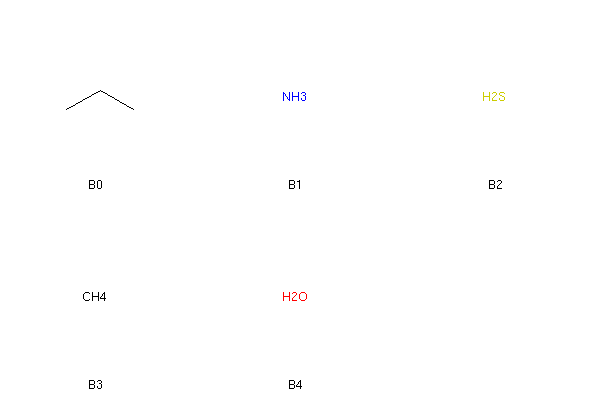

In [12]:
global BB_list


clear_output()

if len(BB_list)>0:
    mol_list = [Chem.MolFromSmiles(smiles) for smiles in BB_list]
    [mol.SetProp('_Name', 'B'+str(i)) for i,mol in enumerate(mol_list)]
    ibu=Chem.Draw.MolsToGridImage(mol_list,legends=[mol.GetProp('_Name') for mol in mol_list])
    display(ibu)

            



In [5]:
global smiles
clear_output()
if len(smiles)>0:
    mol_lists = [Chem.MolFromSmiles(smile) for smile in smiles]
    [mol.SetProp('_Name', 'B'+str(i)) for i,mol in enumerate(mol_lists)]
    ibu1=Chem.Draw.MolsToGridImage(mol_lists,legends=[mol.GetProp('_Name') for mol in mol_lists])
    display(ibu1)


In [6]:
GUI_2()

Button(description='Proceed to the next section', layout=Layout(border='solid 1px black', width='auto'), style…

HTML(value='<font color=crimson><font size=5><b><u>SECTION 2: GENERATION RULES</font>')

Accordion(children=(VBox(children=(HTML(value='Specify the building blocks which must be present in all the mo…

Button(description='Generate rules file', layout=Layout(border='solid 1px black'), style=ButtonStyle())

Button(description='Proceed to the next section', layout=Layout(border='solid 1px black', width='auto'), style…

HTML(value='<font color=crimson><font size=5><b><u>SECTION 3: GENERATION OF COMMAND LINE</font>')

Button(description='Generate Command line', layout=Layout(border='solid 1px black', width='auto'), style=Butto…